In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/thumbs-up.png
/kaggle/input/images/skull-icon.png
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [3]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
real = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [4]:
#checking how the data looks like
fake.head(10)
fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
#checking diffrenet subjects and their counts
fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [6]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
fake["category"]=1
real["category"]=0

In [9]:
df=pd.concat([fake,real]).reset_index(drop=True)

In [10]:
df.tail()

,title,text,subject,date,category
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


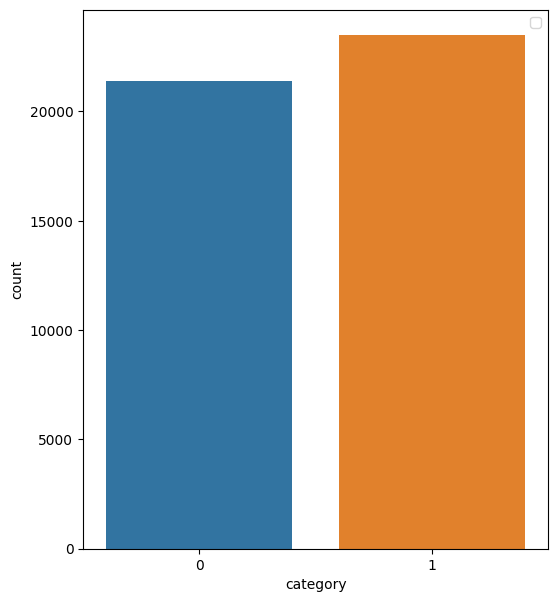

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,7))
sns.countplot(x=df["category"], data=df)
plt.legend()

<Axes: xlabel='subject', ylabel='count'>

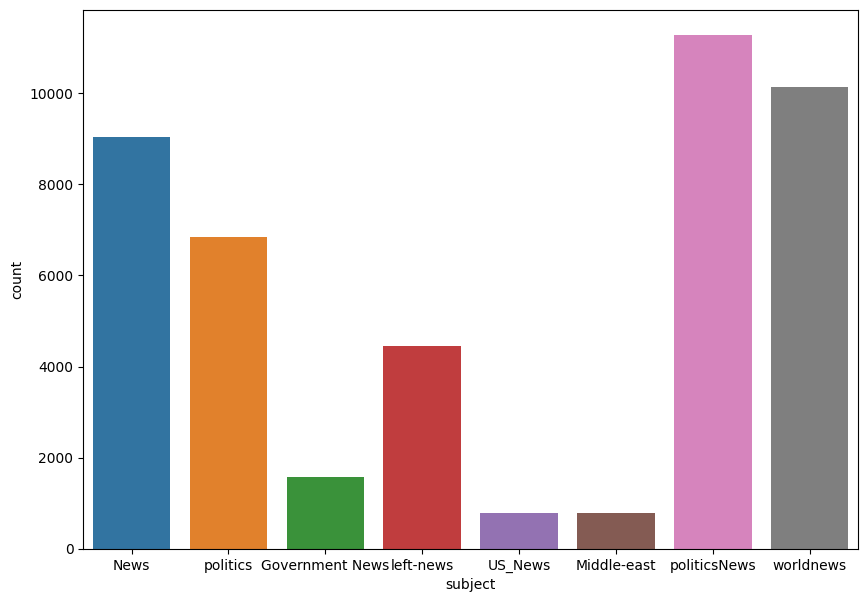

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["subject"],data=df)

In [13]:
df=df[["text","category"]]

In [14]:
df.head()

,text,category
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [15]:
df.isna().sum()*100/len(df)

text        0.0
category    0.0
dtype: float64

In [16]:
blanks=[]

for index,text in df["text"].items():
    if text.isspace():
        blanks.append(index)

len(blanks)

631

In [17]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [18]:
df["text"][10922]

'This Congresswoman has a potty mouth and a bitter attitude towards whites. She s a hateful racist who is paranoid that everyone is out to get her. She just tossed baseless accusations at the Trump administration in an appearance on The Washington Post podcast  Cape Up with Jonathan Capehart.  (See our previous report on the interview below.)Here are the lowlights:Waters accused President Trump of colluding with Russia during the 2016 election, without offering evidence.  I believe this President has colluded with the Russians, with the Kremlin, with the oligarchs, perhaps, of Russia to undermine our election systems,  Waters told Capehart. (4:00) The California congresswoman also criticized the Senate investigation into Trump-Russia ties as not credible.  They re not moving fast enough!  she exclaimed. However, she praised the media for their investigations into Trump-Russia ties. (4:35) Waters described Attorney General Jeff Sessions as a  throwback to the days of Jim Crow,  equating

In [19]:
df.shape

(44898, 2)

In [20]:
df.drop(blanks,inplace=True)

In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
nlp=spacy.load("en_core_web_sm")

In [22]:
lemma=WordNetLemmatizer()

In [23]:
list1=nlp.Defaults.stop_words
print(len(list1))

list2=stopwords.words('english')
print(len(list2))

Stopwords = set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [24]:
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [25]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [26]:
from wordcloud import WordCloud

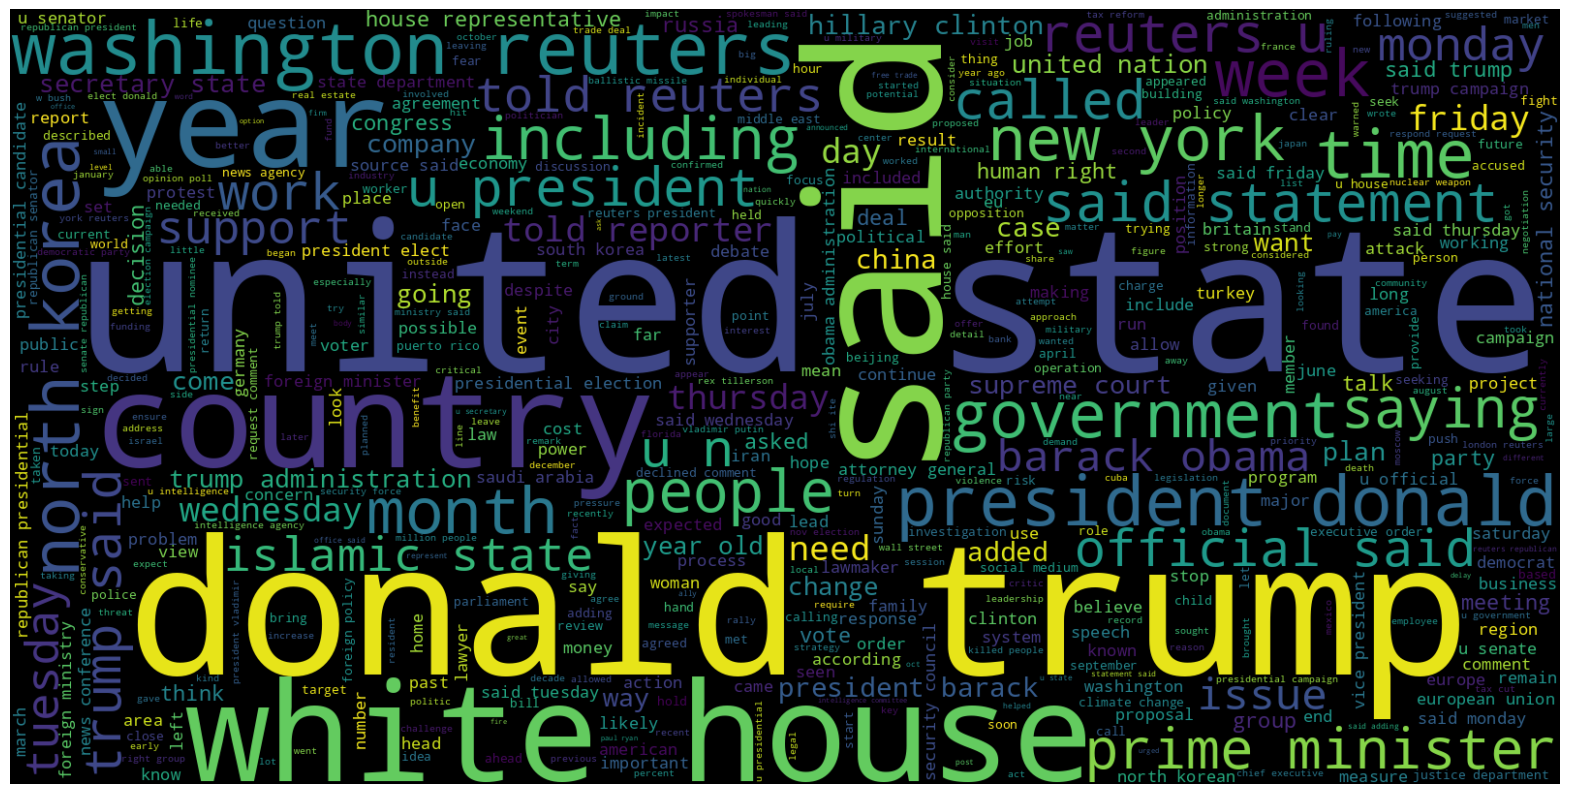

In [27]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500, width =1600, height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc, interpolation ='bilinear')

In [28]:
from PIL import Image

In [29]:
thumb="/kaggle/input/images/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon,box=icon)

rgb_array=np.array(mask)

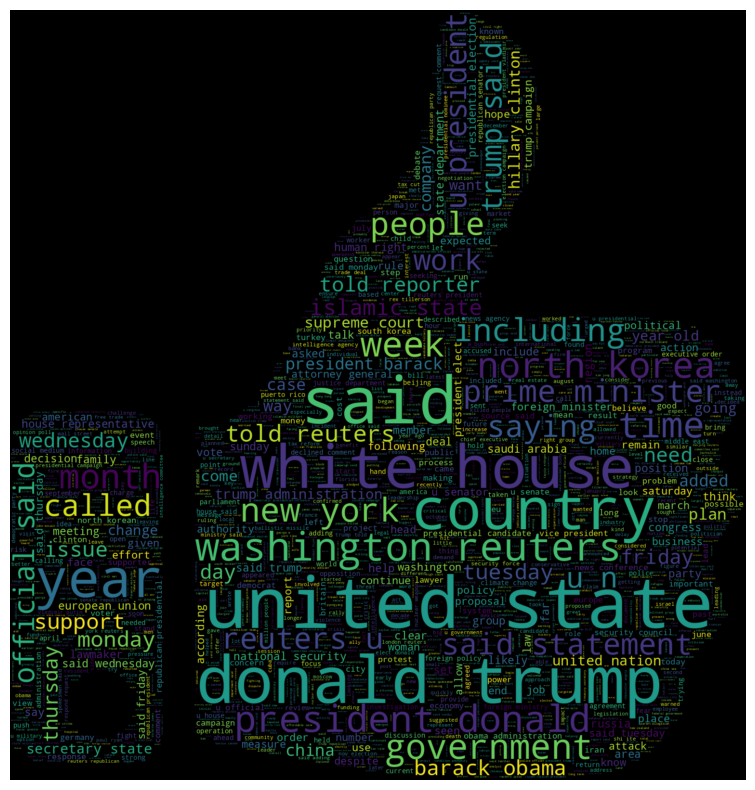

In [30]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [31]:
#creating word cloud using skull image for fake news which depict that 
#fake news are dangerous 

skull="/kaggle/input/images/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

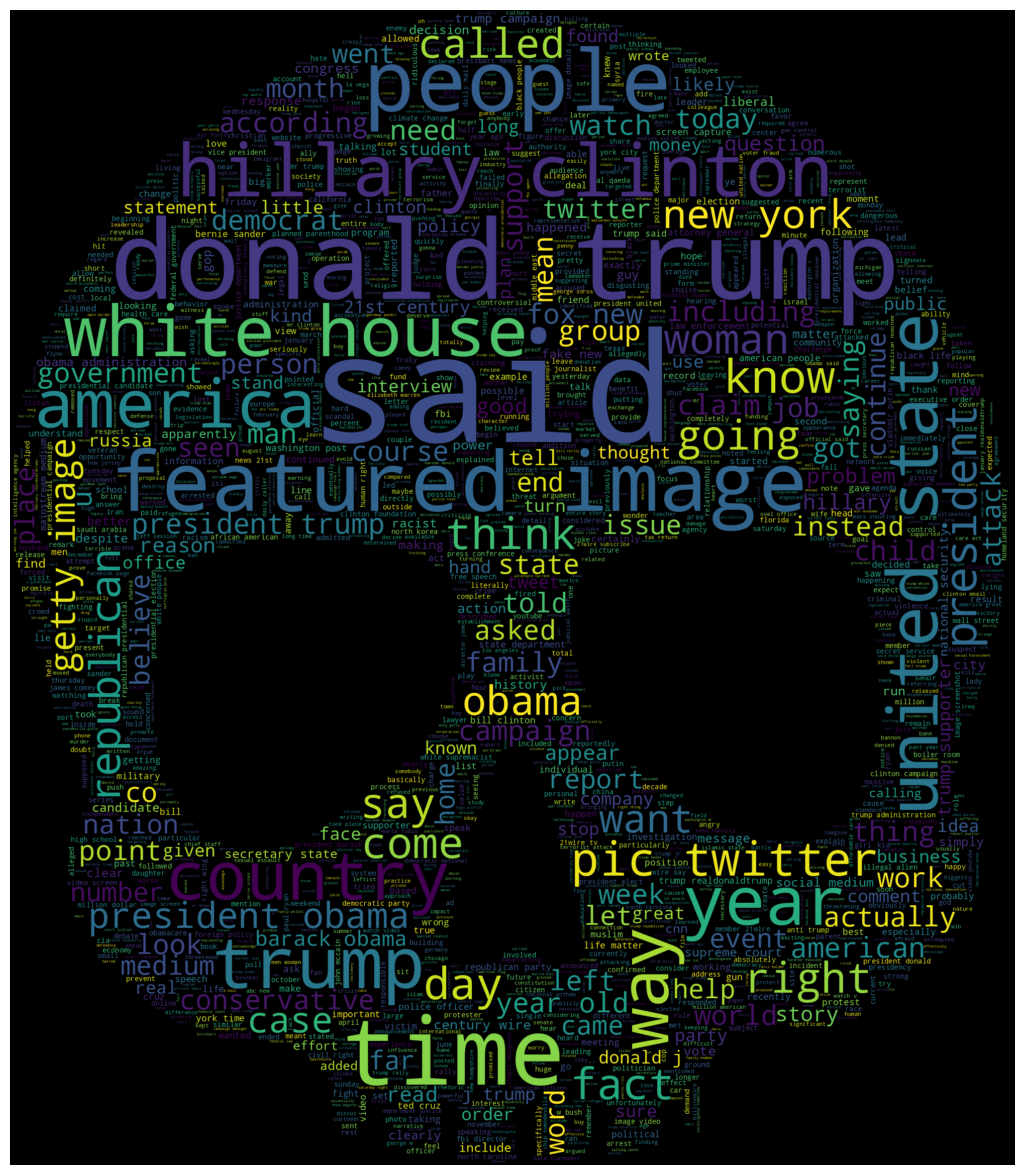

In [32]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [33]:
#splitting the 
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [35]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [36]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.99      0.99      0.99      7562

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609



In [38]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9932918064206996


In [39]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[7000   47]
 [  51 7511]]


In [40]:
pip install newspaper3k

^C
Note: you may need to restart the kernel to use updated packages.


In [41]:
from newspaper import Article

def get_article_text(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.title + " " + article.text

def clean_input_text(text):
    # Use the same clean_text function you created earlier
    return clean_text(text)

def predict_news_from_url(url, model=text_clf):
    try:
        raw_text = get_article_text(url)
        cleaned = clean_input_text(raw_text)
        prediction = model.predict([cleaned])
        return "FAKE News ❌" if prediction[0] == 1 else "REAL News ✅"
    except Exception as e:
        return f"Error processing URL: {e}"

ModuleNotFoundError: No module named 'newspaper'

In [ ]:
url = "https://abcnews.go.com/US/active-shooter-reported-florida-state-university-fsu-alert/story?id=120911309"
result = predict_news_from_url(url)
print("Prediction:", result)